# **Solar Data Discovery** 

## **Sierraleone Data Profiling, Cleaning, and EDA**

In [ ]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [4]:
# Reading DataSets 
benin_data = pd.read_csv("../data/benin-malanville.csv", parse_dates=['Timestamp'],date_format="%y %m %d %h %m")

### Data Profiling

In [5]:
# display the first 10 records
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
# display the last 10 records 
benin_data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [8]:
# display the shape of the data to get info about number features and instance 
print(f"benin Solar data Information: ")
print(f"Instances: {benin_data.shape[0]} records ")
print(f"Features:  {benin_data.shape[1] } columns")

benin Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [9]:
# Dataset information about type of each columns, size 
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [10]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': benin_data.columns,
    '# of unique': benin_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8609
DNI,DNI,8905
DHI,DHI,6995
ModA,ModA,10755
ModB,ModB,8461
Tamb,Tamb,329
RH,RH,980
WS,WS,164
WSgust,WSgust,92


In [11]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {benin_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in benin_data.columns:
    percent =(benin_data[col].isna().sum()/benin_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [12]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    'columns':benin_data.columns,
    '# missing': benin_data.isna().sum(), 
    '% missing': benin_data.isna().mean()*100
})
no_missing

,columns,# missing,% missing
Timestamp,Timestamp,0,0.0
GHI,GHI,0,0.0
DNI,DNI,0,0.0
DHI,DHI,0,0.0
ModA,ModA,0,0.0
ModB,ModB,0,0.0
Tamb,Tamb,0,0.0
RH,RH,0,0.0
WS,WS,0,0.0
WSgust,WSgust,0,0.0


In [ ]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {benin_data.duplicated().sum()}".center(150))
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        
                                                    Number of Duplicated values in the dataset: 0                                                     


In [15]:
# finding negative values 
negative_values = pd.DataFrame({
    'columns': benin_data.columns,
    'dtypes': benin_data.dtypes,
    'num of -ve values': benin_data.select_dtypes(include='number').lt(0).sum(),
    "% of -ve values": round(benin_data.select_dtypes(include='number').lt(0).mean() *100, 2),
})

negative_values

,columns,dtypes,num of -ve values,% of -ve values
BP,Timestamp,int64,0.0,0.00
Cleaning,GHI,int64,0.0,0.00
Comments,DNI,float64,0.0,0.00
DHI,DHI,float64,259182.0,49.31
DNI,ModA,float64,275987.0,52.51
GHI,ModB,float64,258847.0,49.25
ModA,Tamb,float64,0.0,0.00
ModB,RH,float64,0.0,0.00
Precipitation,WS,float64,0.0,0.00
RH,WSgust,float64,0.0,0.00


In [16]:
# Statistical Summery 
benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records
  -  The Dataset has 

### EDA Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt  
# import seaborn as sbn 

"Looking for outlines, missing values and incorrect entries on `GHI, DNI, DHI`and outlier on `ModB, ModA` and wend speed data `WS, and WSgust`"

In [17]:
# checking incorrect entries of GHI, DNI, and DHI
benin_data[['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,2.121113,2.809195
std,331.131327,261.710501,158.691074,326.894859,316.536515,1.603466,2.029120
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,1.000000,1.300000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,1.900000,2.600000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,3.100000,4.100000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,19.500000,26.600000


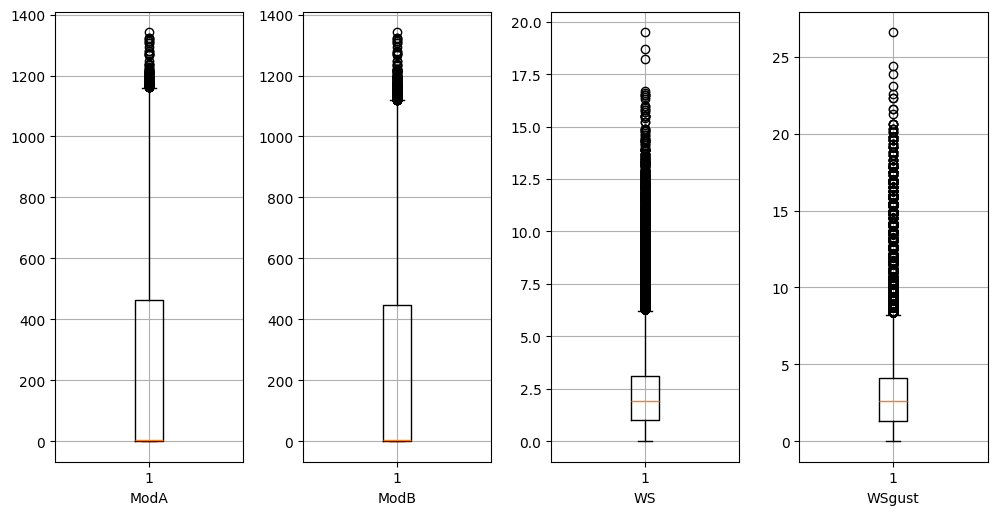

In [18]:
# checking for outliers for Modb, and ModA, WS, WSgust using boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(['ModA', 'ModB', 'WS', 'WSgust'], start = 1):
    plt.subplot(3,8,i)
    plt.boxplot(benin_data[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

## Enter Quantile Range 

In [19]:
column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(benin_data[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(benin_data[column]).sum(),
    '% of Outlier': round(IQR_outlier(benin_data[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,145,0.03
DNI,DNI,15196,2.89
DHI,DHI,8733,1.66
ModA,ModA,98,0.02
ModB,ModB,240,0.05
WS,WS,6717,1.28
WSgust,WSgust,5368,1.02


## Checking Outliers with Z Score

In [ ]:
from scipy.stats import zscore 
import numpy as np
# checking for outliers using zscore
def z_score_outlier(col): 
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(benin_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier




,column,# of outlier,% of Outlier
0,DHI,3738,0.71
1,GHI,89,0.02
2,DNI,0,0.00
3,ModA,27,0.01
4,ModB,63,0.01
5,WS,3109,0.59
6,WSgust,3500,0.67


In [22]:
# Replace outliers with median
for col in cols:
    median_value = benin_data[col].median()
    benin_data.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [mask.sum() for mask in outlier_z_score.values()],
    '% of Outliers': [round(mask.mean() * 100, 2) for mask in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           3738           0.71
1     GHI             89           0.02
2     DNI              0           0.00
3    ModA             27           0.01
4    ModB             63           0.01
5      WS           3109           0.59
6  WSgust           3500           0.67


In [23]:
benin_data.to_csv("../data/Clean_benin_data.csv", index =False)